In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
def stock_vis_stats(stock_n, df):
    print(stock_n)
    display(df[["mse", "mae", "mape", "rse"]].describe(include='all'))

def stock_vis_plot(df, metric=None):

    plt.figure(figsize=(10, 6))
    
    for w_l in df['window_l'].unique():
        subset = df[df['window_l'] == w_l]
        plt.plot(subset['pred_l'], subset[metric], marker='o', label=f'sl={w_l}')
    
    plt.title(f'{metric.upper()} vs Prediction Length for different Sequence Lengths')
    plt.xlabel('Prediction Length (pl)')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.grid(True)
    plt.show()

def stock_vis(stock_name, df_list):
    stock_vis_stats(stock_name, df_list[stock_name])
    for metric in ['mse', 'mae', 'rse']:
        stock_vis_plot(df_list[stock_name] ,metric=metric)

In [6]:
raw_file = open("result_new1.txt", 'r')
raw_str = raw_file.read()
#print(raw_str)

raw_str = raw_str.strip().split('\n')

for i in raw_str:
    if i == '':
        raw_str.remove(i)

# print(len(raw_str))
# print(raw_str[:10])

parsed_data = []

for i in range(0, len(raw_str), 2):

    header = raw_str[i].split('_')
    metrics = raw_str[i + 1].split(',')

    stock_name = header[1]
    window_length = header[2]
    pred_length = header[3]
    model = header[4]

    mse = float(metrics[0].split(":")[1])
    mae = float(metrics[1].split(":")[1])
    mape = float(metrics[2].split(":")[1])
    rse = float(metrics[3].split(":")[1])

    parsed_data.append({ "stock": stock_name, "window_l": window_length, "pred_l": pred_length, "model": model, "mse": mse, "mae": mae, "mape": mape, "rse": rse})





,stock,window_l,pred_l,model,mse,mae,mape,rse
0,000001SZ,50,1,PatchTST,0.710249,0.622147,1.590928,1.017885
1,000001SZ,50,7,PatchTST,0.709819,0.623442,1.542138,1.014803
2,000001SZ,50,14,PatchTST,0.713623,0.625320,1.599026,1.016539
3,000001SZ,50,30,PatchTST,0.711662,0.624347,1.533571,1.014063
4,000001SZ,100,1,PatchTST,0.718915,0.633814,1.744002,1.024076
...,...,...,...,...,...,...,...,...
1206,002050SZ,100,30,PatchTST,0.996693,0.751988,1.687412,1.019525
1207,002050SZ,200,1,PatchTST,1.007952,0.758387,2.202534,1.027503
1208,002050SZ,200,7,PatchTST,1.012551,0.757745,2.037074,1.029659
1209,002050SZ,200,14,PatchTST,0.997848,0.750235,1.879261,1.021164


000156SZ


,mse,mae,mape,rse
count,12.000000,12.000000,12.000000,12.000000
mean,0.012571,0.080384,1.648103,1.026997
std,0.000192,0.000842,0.094906,0.011084
min,0.012390,0.079390,1.463139,1.010172
25%,0.012457,0.079718,1.631160,1.022724
50%,0.012495,0.080347,1.643746,1.026608
75%,0.012636,0.080696,1.691246,1.031247
max,0.013078,0.082386,1.819799,1.051281


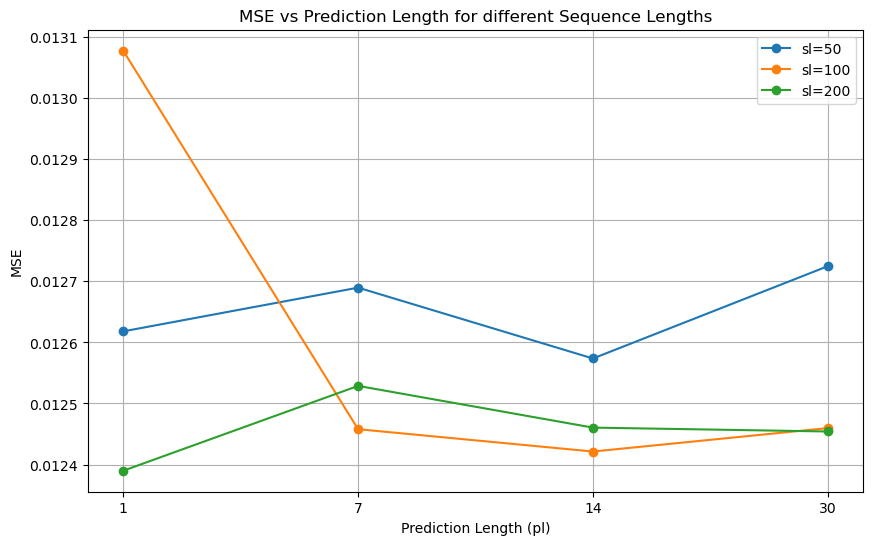

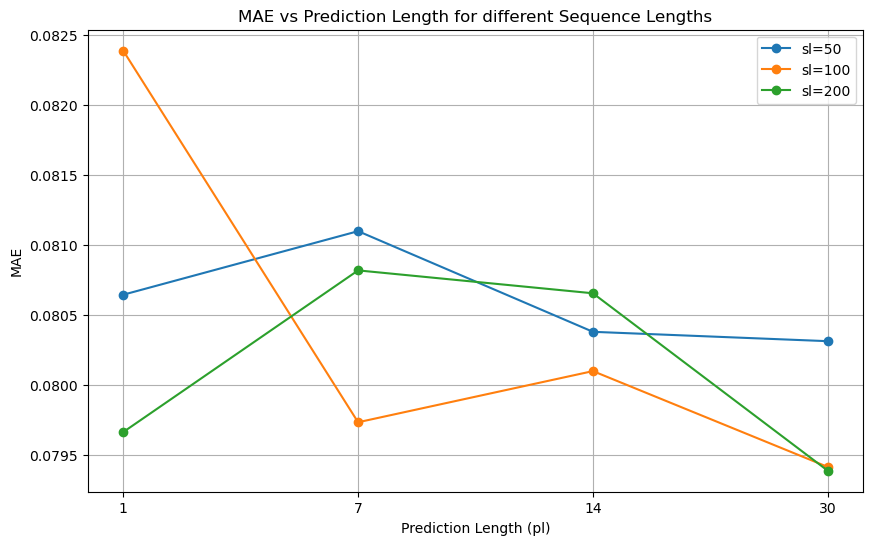

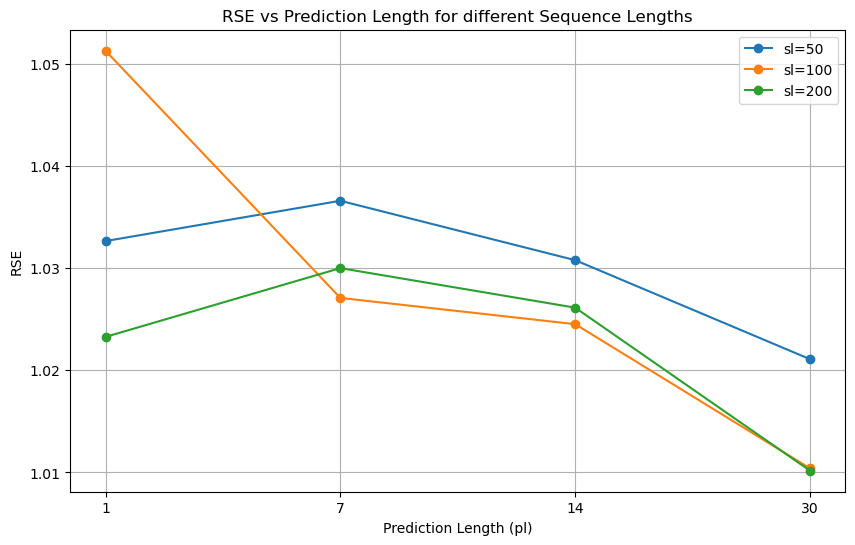

000001SZ


,mse,mae,mape,rse
count,12.000000,12.000000,12.000000,12.000000
mean,0.715900,0.627651,1.637934,1.019067
std,0.006906,0.005752,0.138269,0.005562
min,0.709043,0.621233,1.435477,1.012195
25%,0.710142,0.624121,1.539996,1.014618
50%,0.714846,0.625017,1.618174,1.018574
75%,0.718066,0.633067,1.711116,1.023418
max,0.732254,0.639405,1.868381,1.030715


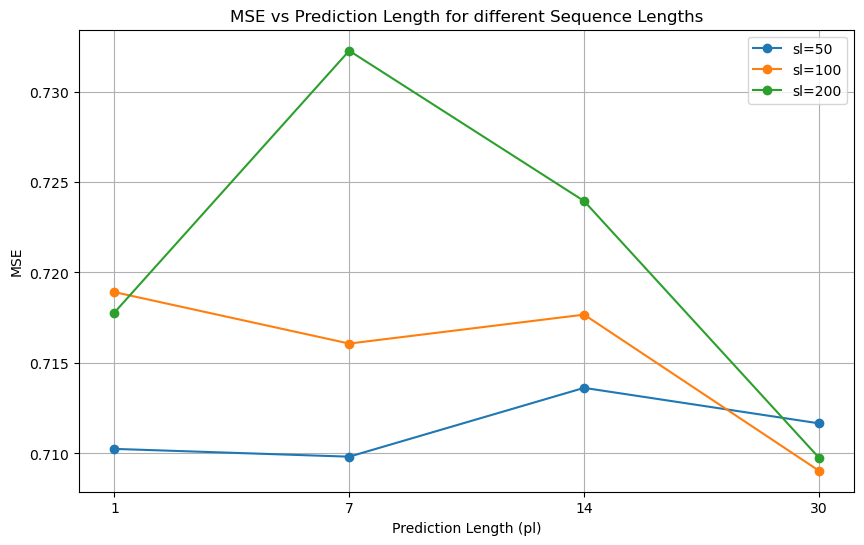

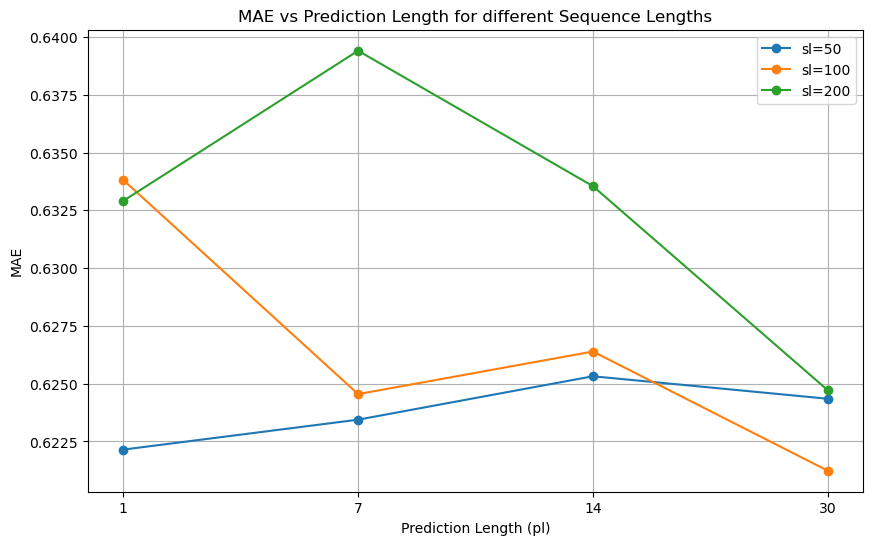

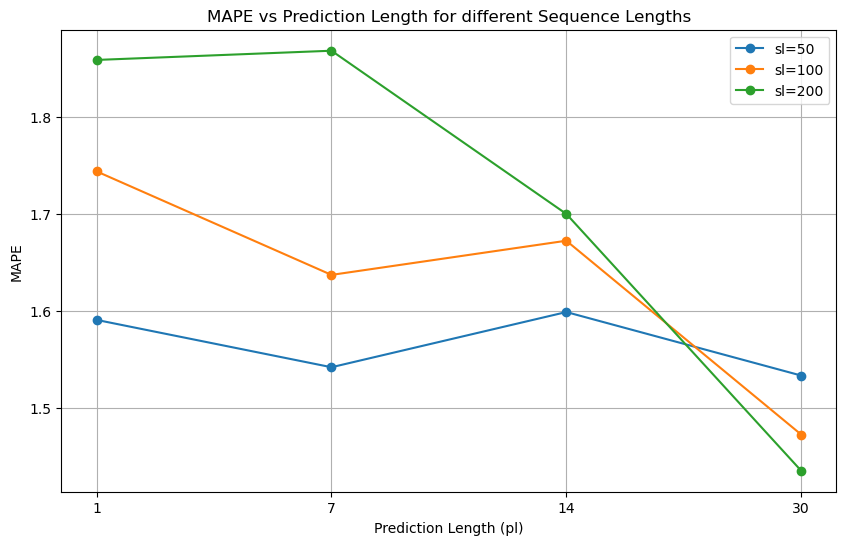

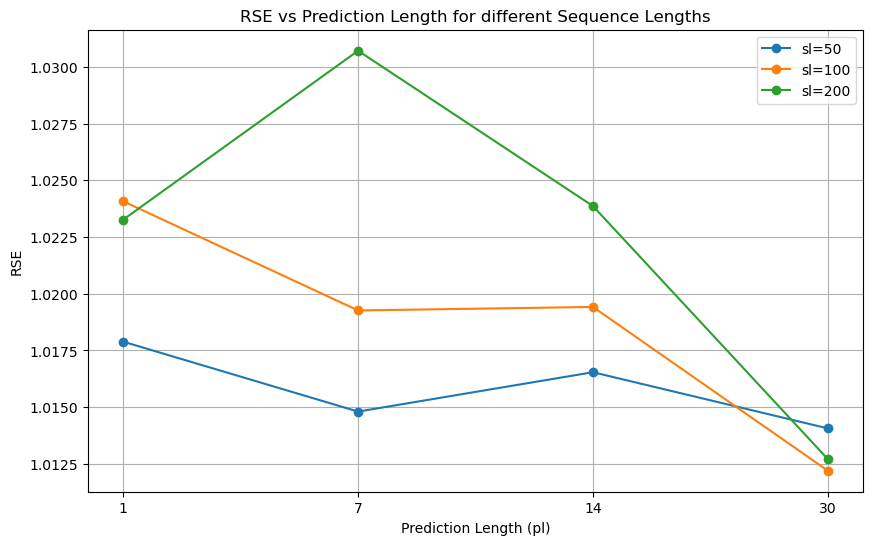

In [8]:
raw_df = pd.DataFrame(parsed_data)

df_list = {}

for stock_n, v in raw_df.groupby('stock'):
    df_list[stock_n] = v.copy().reset_index()




display(raw_df)


stock_vis("000156SZ", df_list)


for i in df_list.keys():

    stock_vis_stats(i, df_list[i])
    for metric in ['mse', 'mae', 'mape', 'rse']:
        stock_vis_plot(df_list[i] ,metric=metric)
    break

    # print("Stock : %s"%(i))
    # display(df_list[i][["mse", "mae", "rse"]].describe(include='all'))

# df_list["000002SZ"][["mse", "mae", "rse"]].describe(include='all')

# Result display

In [ ]:
#find the lowest m